## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  44.153706   503.166001  0.365123  10.854597  1.283188
1  32.168469   844.477628  0.041420   9.695250  0.767320
2  94.083766   389.695703  0.515234   6.823473  0.929896
3  81.120328  1256.940071  0.689018   1.499781  1.473178
4   8.331641  1251.758140  0.713713   4.198709  1.534327


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.10375 | train_mse: 2.11485 | train_mae: 1.05681 |  0:00:00s
epoch 1  | loss: 0.83673 | train_mse: 1.67841 | train_mae: 0.94938 |  0:00:00s
epoch 2  | loss: 0.65892 | train_mse: 1.53802 | train_mae: 0.8703  |  0:00:00s


epoch 3  | loss: 0.41684 | train_mse: 1.76238 | train_mae: 0.91625 |  0:00:00s
epoch 4  | loss: 0.59692 | train_mse: 0.80178 | train_mae: 0.66299 |  0:00:00s
epoch 5  | loss: 0.45711 | train_mse: 0.63217 | train_mae: 0.55603 |  0:00:00s


epoch 6  | loss: 0.46337 | train_mse: 0.55485 | train_mae: 0.526   |  0:00:00s
epoch 7  | loss: 0.37693 | train_mse: 0.62296 | train_mae: 0.5537  |  0:00:00s
epoch 8  | loss: 0.29428 | train_mse: 0.62161 | train_mae: 0.53391 |  0:00:00s


epoch 9  | loss: 0.41913 | train_mse: 0.47288 | train_mae: 0.50352 |  0:00:00s
epoch 10 | loss: 0.34107 | train_mse: 0.59916 | train_mae: 0.55407 |  0:00:00s
epoch 11 | loss: 0.39711 | train_mse: 0.70101 | train_mae: 0.58053 |  0:00:01s
epoch 12 | loss: 0.41537 | train_mse: 0.56869 | train_mae: 0.56168 |  0:00:01s


epoch 13 | loss: 0.31947 | train_mse: 0.57511 | train_mae: 0.53889 |  0:00:01s
epoch 14 | loss: 0.31383 | train_mse: 0.37172 | train_mae: 0.43955 |  0:00:01s
epoch 15 | loss: 0.27829 | train_mse: 0.37967 | train_mae: 0.4607  |  0:00:01s


epoch 16 | loss: 0.25294 | train_mse: 0.344   | train_mae: 0.44464 |  0:00:01s
epoch 17 | loss: 0.2187  | train_mse: 0.32009 | train_mae: 0.4098  |  0:00:01s


epoch 18 | loss: 0.29588 | train_mse: 0.28512 | train_mae: 0.38666 |  0:00:01s
epoch 19 | loss: 0.20058 | train_mse: 0.31206 | train_mae: 0.41874 |  0:00:01s
epoch 20 | loss: 0.17283 | train_mse: 0.28886 | train_mae: 0.40892 |  0:00:01s


epoch 21 | loss: 0.27427 | train_mse: 0.21524 | train_mae: 0.35805 |  0:00:01s
epoch 22 | loss: 0.16512 | train_mse: 0.17645 | train_mae: 0.32674 |  0:00:02s
epoch 23 | loss: 0.24491 | train_mse: 0.27643 | train_mae: 0.38901 |  0:00:02s


epoch 24 | loss: 0.11994 | train_mse: 0.26108 | train_mae: 0.38567 |  0:00:02s
epoch 25 | loss: 0.16341 | train_mse: 0.15084 | train_mae: 0.29801 |  0:00:02s
epoch 26 | loss: 0.24381 | train_mse: 0.11982 | train_mae: 0.27235 |  0:00:02s


epoch 27 | loss: 0.13925 | train_mse: 0.10631 | train_mae: 0.24895 |  0:00:02s
epoch 28 | loss: 0.27349 | train_mse: 0.10439 | train_mae: 0.24862 |  0:00:02s
epoch 29 | loss: 0.19118 | train_mse: 0.11792 | train_mae: 0.26604 |  0:00:02s


epoch 30 | loss: 0.1862  | train_mse: 0.17796 | train_mae: 0.30926 |  0:00:02s


epoch 31 | loss: 0.13026 | train_mse: 0.15582 | train_mae: 0.27797 |  0:00:03s
epoch 32 | loss: 0.1337  | train_mse: 0.10782 | train_mae: 0.24305 |  0:00:03s


epoch 33 | loss: 0.163   | train_mse: 0.11979 | train_mae: 0.25537 |  0:00:03s
epoch 34 | loss: 0.34706 | train_mse: 0.12065 | train_mae: 0.27392 |  0:00:03s
epoch 35 | loss: 0.22726 | train_mse: 0.11131 | train_mae: 0.25748 |  0:00:03s


epoch 36 | loss: 0.35139 | train_mse: 0.12404 | train_mae: 0.27903 |  0:00:03s
epoch 37 | loss: 0.19844 | train_mse: 0.12502 | train_mae: 0.27195 |  0:00:03s
epoch 38 | loss: 0.18422 | train_mse: 0.13234 | train_mae: 0.27562 |  0:00:03s
epoch 39 | loss: 0.18701 | train_mse: 0.12644 | train_mae: 0.27528 |  0:00:03s


epoch 40 | loss: 0.16005 | train_mse: 0.14385 | train_mae: 0.29021 |  0:00:03s
epoch 41 | loss: 0.2023  | train_mse: 0.15138 | train_mae: 0.29893 |  0:00:03s
epoch 42 | loss: 0.13861 | train_mse: 0.16318 | train_mae: 0.29991 |  0:00:04s


epoch 43 | loss: 0.232   | train_mse: 0.11852 | train_mae: 0.26797 |  0:00:04s
epoch 44 | loss: 0.18668 | train_mse: 0.11244 | train_mae: 0.2643  |  0:00:04s
epoch 45 | loss: 0.19549 | train_mse: 0.11567 | train_mae: 0.26723 |  0:00:04s
epoch 46 | loss: 0.16059 | train_mse: 0.1035  | train_mae: 0.2578  |  0:00:04s


epoch 47 | loss: 0.205   | train_mse: 0.09887 | train_mae: 0.24687 |  0:00:04s
epoch 48 | loss: 0.25534 | train_mse: 0.11333 | train_mae: 0.24855 |  0:00:04s
epoch 49 | loss: 0.14764 | train_mse: 0.11452 | train_mae: 0.25193 |  0:00:04s
epoch 50 | loss: 0.15911 | train_mse: 0.12176 | train_mae: 0.26368 |  0:00:04s


epoch 51 | loss: 0.157   | train_mse: 0.11877 | train_mae: 0.25411 |  0:00:04s
epoch 52 | loss: 0.1734  | train_mse: 0.12332 | train_mae: 0.2579  |  0:00:04s
epoch 53 | loss: 0.10013 | train_mse: 0.11424 | train_mae: 0.24508 |  0:00:04s
epoch 54 | loss: 0.20273 | train_mse: 0.13241 | train_mae: 0.27043 |  0:00:04s


epoch 55 | loss: 0.15829 | train_mse: 0.1416  | train_mae: 0.28365 |  0:00:04s
epoch 56 | loss: 0.14186 | train_mse: 0.11049 | train_mae: 0.2506  |  0:00:04s
epoch 57 | loss: 0.11341 | train_mse: 0.10324 | train_mae: 0.24292 |  0:00:05s


epoch 58 | loss: 0.10808 | train_mse: 0.12072 | train_mae: 0.25566 |  0:00:05s
epoch 59 | loss: 0.16476 | train_mse: 0.15297 | train_mae: 0.28099 |  0:00:05s
epoch 60 | loss: 0.10646 | train_mse: 0.17845 | train_mae: 0.29764 |  0:00:05s
epoch 61 | loss: 0.13161 | train_mse: 0.15551 | train_mae: 0.28828 |  0:00:05s


epoch 62 | loss: 0.21252 | train_mse: 0.13805 | train_mae: 0.27742 |  0:00:05s
epoch 63 | loss: 0.21299 | train_mse: 0.1411  | train_mae: 0.28008 |  0:00:05s
epoch 64 | loss: 0.16688 | train_mse: 0.14518 | train_mae: 0.27991 |  0:00:05s
epoch 65 | loss: 0.15287 | train_mse: 0.17359 | train_mae: 0.29905 |  0:00:05s


epoch 66 | loss: 0.14068 | train_mse: 0.25113 | train_mae: 0.34696 |  0:00:05s
epoch 67 | loss: 0.10193 | train_mse: 0.256   | train_mae: 0.34821 |  0:00:05s
epoch 68 | loss: 0.21092 | train_mse: 0.22288 | train_mae: 0.33042 |  0:00:05s
epoch 69 | loss: 0.1884  | train_mse: 0.21053 | train_mae: 0.31957 |  0:00:05s


epoch 70 | loss: 0.20178 | train_mse: 0.16601 | train_mae: 0.29185 |  0:00:05s
epoch 71 | loss: 0.10893 | train_mse: 0.15835 | train_mae: 0.28626 |  0:00:05s
epoch 72 | loss: 0.32344 | train_mse: 0.16809 | train_mae: 0.29194 |  0:00:06s


epoch 73 | loss: 0.13038 | train_mse: 0.12912 | train_mae: 0.26153 |  0:00:06s
epoch 74 | loss: 0.19822 | train_mse: 0.11342 | train_mae: 0.24396 |  0:00:06s
epoch 75 | loss: 0.08646 | train_mse: 0.09206 | train_mae: 0.22577 |  0:00:06s
epoch 76 | loss: 0.07493 | train_mse: 0.07321 | train_mae: 0.20641 |  0:00:06s


epoch 77 | loss: 0.15036 | train_mse: 0.07134 | train_mae: 0.20192 |  0:00:06s
epoch 78 | loss: 0.11501 | train_mse: 0.14452 | train_mae: 0.26264 |  0:00:06s
epoch 79 | loss: 0.08786 | train_mse: 0.20642 | train_mae: 0.298   |  0:00:06s


epoch 80 | loss: 0.32142 | train_mse: 0.22772 | train_mae: 0.31766 |  0:00:06s
epoch 81 | loss: 0.20687 | train_mse: 0.1375  | train_mae: 0.27021 |  0:00:06s
epoch 82 | loss: 0.1084  | train_mse: 0.0917  | train_mae: 0.23317 |  0:00:06s
epoch 83 | loss: 0.13492 | train_mse: 0.09929 | train_mae: 0.22024 |  0:00:06s


epoch 84 | loss: 0.15123 | train_mse: 0.08706 | train_mae: 0.21786 |  0:00:06s
epoch 85 | loss: 0.15869 | train_mse: 0.1021  | train_mae: 0.24919 |  0:00:06s
epoch 86 | loss: 0.127   | train_mse: 0.11201 | train_mae: 0.24895 |  0:00:07s


epoch 87 | loss: 0.10337 | train_mse: 0.09811 | train_mae: 0.23915 |  0:00:07s
epoch 88 | loss: 0.20927 | train_mse: 0.0822  | train_mae: 0.22292 |  0:00:07s
epoch 89 | loss: 0.12312 | train_mse: 0.07712 | train_mae: 0.21014 |  0:00:07s
epoch 90 | loss: 0.09416 | train_mse: 0.09563 | train_mae: 0.23778 |  0:00:07s


epoch 91 | loss: 0.08484 | train_mse: 0.10594 | train_mae: 0.25329 |  0:00:07s
epoch 92 | loss: 0.13958 | train_mse: 0.06889 | train_mae: 0.19803 |  0:00:07s
epoch 93 | loss: 0.2292  | train_mse: 0.07359 | train_mae: 0.20413 |  0:00:07s


epoch 94 | loss: 0.18007 | train_mse: 0.06376 | train_mae: 0.19096 |  0:00:07s
epoch 95 | loss: 0.07627 | train_mse: 0.07174 | train_mae: 0.19781 |  0:00:07s
epoch 96 | loss: 0.10696 | train_mse: 0.07789 | train_mae: 0.20903 |  0:00:07s
epoch 97 | loss: 0.10341 | train_mse: 0.07135 | train_mae: 0.20463 |  0:00:07s


epoch 98 | loss: 0.14157 | train_mse: 0.07981 | train_mae: 0.20837 |  0:00:07s
epoch 99 | loss: 0.17464 | train_mse: 0.08719 | train_mae: 0.21308 |  0:00:07s
epoch 100| loss: 0.11699 | train_mse: 0.08492 | train_mae: 0.21186 |  0:00:07s


epoch 101| loss: 0.10623 | train_mse: 0.08903 | train_mae: 0.20584 |  0:00:08s
epoch 102| loss: 0.1233  | train_mse: 0.09196 | train_mae: 0.21373 |  0:00:08s
epoch 103| loss: 0.12799 | train_mse: 0.09578 | train_mae: 0.22804 |  0:00:08s
epoch 104| loss: 0.14476 | train_mse: 0.09085 | train_mae: 0.22854 |  0:00:08s


epoch 105| loss: 0.18647 | train_mse: 0.1093  | train_mae: 0.24573 |  0:00:08s
epoch 106| loss: 0.14397 | train_mse: 0.07976 | train_mae: 0.21559 |  0:00:08s
epoch 107| loss: 0.13773 | train_mse: 0.07725 | train_mae: 0.21768 |  0:00:08s
epoch 108| loss: 0.15321 | train_mse: 0.08256 | train_mae: 0.2263  |  0:00:08s


epoch 109| loss: 0.08614 | train_mse: 0.07422 | train_mae: 0.21178 |  0:00:08s
epoch 110| loss: 0.15039 | train_mse: 0.06993 | train_mae: 0.19748 |  0:00:08s
epoch 111| loss: 0.13054 | train_mse: 0.06961 | train_mae: 0.19321 |  0:00:08s
epoch 112| loss: 0.14839 | train_mse: 0.07701 | train_mae: 0.2097  |  0:00:08s


epoch 113| loss: 0.12556 | train_mse: 0.12948 | train_mae: 0.28024 |  0:00:08s
epoch 114| loss: 0.13056 | train_mse: 0.12858 | train_mae: 0.27163 |  0:00:08s
epoch 115| loss: 0.08936 | train_mse: 0.0818  | train_mae: 0.21897 |  0:00:08s


epoch 116| loss: 0.14128 | train_mse: 0.07223 | train_mae: 0.20443 |  0:00:09s
epoch 117| loss: 0.18313 | train_mse: 0.07594 | train_mae: 0.21107 |  0:00:09s
epoch 118| loss: 0.24368 | train_mse: 0.07236 | train_mae: 0.2082  |  0:00:09s
epoch 119| loss: 0.11251 | train_mse: 0.0608  | train_mae: 0.19362 |  0:00:09s


epoch 120| loss: 0.11087 | train_mse: 0.06821 | train_mae: 0.20233 |  0:00:09s
epoch 121| loss: 0.09292 | train_mse: 0.07044 | train_mae: 0.20347 |  0:00:09s
epoch 122| loss: 0.18724 | train_mse: 0.06413 | train_mae: 0.19117 |  0:00:09s
epoch 123| loss: 0.0892  | train_mse: 0.06541 | train_mae: 0.19204 |  0:00:09s


epoch 124| loss: 0.16738 | train_mse: 0.07186 | train_mae: 0.20504 |  0:00:09s
epoch 125| loss: 0.18167 | train_mse: 0.08281 | train_mae: 0.21747 |  0:00:09s
epoch 126| loss: 0.1257  | train_mse: 0.10674 | train_mae: 0.24457 |  0:00:09s
epoch 127| loss: 0.08938 | train_mse: 0.13712 | train_mae: 0.27313 |  0:00:09s


epoch 128| loss: 0.17545 | train_mse: 0.10147 | train_mae: 0.23001 |  0:00:09s
epoch 129| loss: 0.31698 | train_mse: 0.10148 | train_mae: 0.22889 |  0:00:09s
epoch 130| loss: 0.16602 | train_mse: 0.10143 | train_mae: 0.22329 |  0:00:10s


epoch 131| loss: 0.15598 | train_mse: 0.09387 | train_mae: 0.22085 |  0:00:10s
epoch 132| loss: 0.12038 | train_mse: 0.09206 | train_mae: 0.21766 |  0:00:10s
epoch 133| loss: 0.09144 | train_mse: 0.09032 | train_mae: 0.21159 |  0:00:10s


epoch 134| loss: 0.12358 | train_mse: 0.08725 | train_mae: 0.21975 |  0:00:10s
epoch 135| loss: 0.14087 | train_mse: 0.07781 | train_mae: 0.20446 |  0:00:10s
epoch 136| loss: 0.16259 | train_mse: 0.06892 | train_mae: 0.19641 |  0:00:10s


epoch 137| loss: 0.13379 | train_mse: 0.0601  | train_mae: 0.18873 |  0:00:10s
epoch 138| loss: 0.08265 | train_mse: 0.05509 | train_mae: 0.17227 |  0:00:10s
epoch 139| loss: 0.13988 | train_mse: 0.06416 | train_mae: 0.17963 |  0:00:10s


epoch 140| loss: 0.16845 | train_mse: 0.07043 | train_mae: 0.19282 |  0:00:10s
epoch 141| loss: 0.10071 | train_mse: 0.08107 | train_mae: 0.20585 |  0:00:10s
epoch 142| loss: 0.1529  | train_mse: 0.10573 | train_mae: 0.22093 |  0:00:10s


epoch 143| loss: 0.09397 | train_mse: 0.08204 | train_mae: 0.2047  |  0:00:10s
epoch 144| loss: 0.18355 | train_mse: 0.08216 | train_mae: 0.20476 |  0:00:11s
epoch 145| loss: 0.08779 | train_mse: 0.08919 | train_mae: 0.21287 |  0:00:11s


epoch 146| loss: 0.10633 | train_mse: 0.10852 | train_mae: 0.22455 |  0:00:11s
epoch 147| loss: 0.08432 | train_mse: 0.09167 | train_mae: 0.21296 |  0:00:11s
epoch 148| loss: 0.10772 | train_mse: 0.07006 | train_mae: 0.19759 |  0:00:11s
epoch 149| loss: 0.07639 | train_mse: 0.06694 | train_mae: 0.18848 |  0:00:11s


epoch 150| loss: 0.06569 | train_mse: 0.06356 | train_mae: 0.18531 |  0:00:11s
epoch 151| loss: 0.06726 | train_mse: 0.06592 | train_mae: 0.19634 |  0:00:11s
epoch 152| loss: 0.08177 | train_mse: 0.0702  | train_mae: 0.20217 |  0:00:11s


epoch 153| loss: 0.09849 | train_mse: 0.05787 | train_mae: 0.17915 |  0:00:11s
epoch 154| loss: 0.22252 | train_mse: 0.05645 | train_mae: 0.17193 |  0:00:11s


epoch 155| loss: 0.10908 | train_mse: 0.05363 | train_mae: 0.16761 |  0:00:11s
epoch 156| loss: 0.13734 | train_mse: 0.06492 | train_mae: 0.18784 |  0:00:11s
epoch 157| loss: 0.11531 | train_mse: 0.07314 | train_mae: 0.20462 |  0:00:12s


epoch 158| loss: 0.08695 | train_mse: 0.0803  | train_mae: 0.22159 |  0:00:12s
epoch 159| loss: 0.15997 | train_mse: 0.09078 | train_mae: 0.23164 |  0:00:12s
epoch 160| loss: 0.10313 | train_mse: 0.08163 | train_mae: 0.20876 |  0:00:12s
epoch 161| loss: 0.19339 | train_mse: 0.07002 | train_mae: 0.18894 |  0:00:12s


epoch 162| loss: 0.13767 | train_mse: 0.08605 | train_mae: 0.20413 |  0:00:12s
epoch 163| loss: 0.14929 | train_mse: 0.0787  | train_mae: 0.20086 |  0:00:12s
epoch 164| loss: 0.15586 | train_mse: 0.07212 | train_mae: 0.20481 |  0:00:12s


epoch 165| loss: 0.12834 | train_mse: 0.08007 | train_mae: 0.2196  |  0:00:12s
epoch 166| loss: 0.19248 | train_mse: 0.08977 | train_mae: 0.23025 |  0:00:12s
epoch 167| loss: 0.11401 | train_mse: 0.10249 | train_mae: 0.23927 |  0:00:12s
epoch 168| loss: 0.14579 | train_mse: 0.09838 | train_mae: 0.23578 |  0:00:12s


epoch 169| loss: 0.26888 | train_mse: 0.11096 | train_mae: 0.25414 |  0:00:12s
epoch 170| loss: 0.08833 | train_mse: 0.08888 | train_mae: 0.22627 |  0:00:12s
epoch 171| loss: 0.13075 | train_mse: 0.07774 | train_mae: 0.20935 |  0:00:13s


epoch 172| loss: 0.09751 | train_mse: 0.07004 | train_mae: 0.19717 |  0:00:13s
epoch 173| loss: 0.09263 | train_mse: 0.07978 | train_mae: 0.21393 |  0:00:13s
epoch 174| loss: 0.15995 | train_mse: 0.11598 | train_mae: 0.2458  |  0:00:13s
epoch 175| loss: 0.08859 | train_mse: 0.12149 | train_mae: 0.24886 |  0:00:13s


epoch 176| loss: 0.16746 | train_mse: 0.09769 | train_mae: 0.22849 |  0:00:13s
epoch 177| loss: 0.07221 | train_mse: 0.07218 | train_mae: 0.20594 |  0:00:13s
epoch 178| loss: 0.09108 | train_mse: 0.06112 | train_mae: 0.19193 |  0:00:13s


epoch 179| loss: 0.13596 | train_mse: 0.05724 | train_mae: 0.18879 |  0:00:13s
epoch 180| loss: 0.11392 | train_mse: 0.05217 | train_mae: 0.17435 |  0:00:13s
epoch 181| loss: 0.24838 | train_mse: 0.05422 | train_mae: 0.17823 |  0:00:13s
epoch 182| loss: 0.12915 | train_mse: 0.04801 | train_mae: 0.16278 |  0:00:13s


epoch 183| loss: 0.19819 | train_mse: 0.05084 | train_mae: 0.17284 |  0:00:13s
epoch 184| loss: 0.09385 | train_mse: 0.05846 | train_mae: 0.18773 |  0:00:13s
epoch 185| loss: 0.09795 | train_mse: 0.05744 | train_mae: 0.18096 |  0:00:13s


epoch 186| loss: 0.0844  | train_mse: 0.05242 | train_mae: 0.17308 |  0:00:14s


epoch 187| loss: 0.1178  | train_mse: 0.05056 | train_mae: 0.16098 |  0:00:14s


epoch 188| loss: 0.08959 | train_mse: 0.0545  | train_mae: 0.16971 |  0:00:14s
epoch 189| loss: 0.14696 | train_mse: 0.06758 | train_mae: 0.19196 |  0:00:15s
epoch 190| loss: 0.13797 | train_mse: 0.08439 | train_mae: 0.21342 |  0:00:15s


epoch 191| loss: 0.16527 | train_mse: 0.08076 | train_mae: 0.2112  |  0:00:15s
epoch 192| loss: 0.1297  | train_mse: 0.09361 | train_mae: 0.22457 |  0:00:15s
epoch 193| loss: 0.1025  | train_mse: 0.09657 | train_mae: 0.22957 |  0:00:15s
epoch 194| loss: 0.18462 | train_mse: 0.08129 | train_mae: 0.21999 |  0:00:15s


epoch 195| loss: 0.1252  | train_mse: 0.08487 | train_mae: 0.21451 |  0:00:15s


epoch 196| loss: 0.0925  | train_mse: 0.11231 | train_mae: 0.23911 |  0:00:15s
epoch 197| loss: 0.178   | train_mse: 0.09448 | train_mae: 0.22957 |  0:00:15s
epoch 198| loss: 0.11278 | train_mse: 0.0851  | train_mae: 0.22719 |  0:00:16s


epoch 199| loss: 0.12033 | train_mse: 0.07791 | train_mae: 0.22204 |  0:00:16s
epoch 200| loss: 0.1275  | train_mse: 0.1033  | train_mae: 0.24254 |  0:00:16s


epoch 201| loss: 0.10093 | train_mse: 0.09107 | train_mae: 0.22899 |  0:00:16s


epoch 202| loss: 0.12505 | train_mse: 0.07573 | train_mae: 0.20614 |  0:00:16s
epoch 203| loss: 0.10608 | train_mse: 0.07424 | train_mae: 0.21053 |  0:00:16s
epoch 204| loss: 0.07676 | train_mse: 0.0862  | train_mae: 0.23008 |  0:00:16s
epoch 205| loss: 0.1632  | train_mse: 0.07616 | train_mae: 0.21633 |  0:00:16s


epoch 206| loss: 0.09063 | train_mse: 0.07892 | train_mae: 0.21761 |  0:00:16s
epoch 207| loss: 0.07863 | train_mse: 0.0792  | train_mae: 0.21474 |  0:00:16s
epoch 208| loss: 0.19012 | train_mse: 0.06586 | train_mae: 0.1951  |  0:00:17s


epoch 209| loss: 0.08025 | train_mse: 0.07724 | train_mae: 0.20987 |  0:00:17s
epoch 210| loss: 0.07281 | train_mse: 0.08799 | train_mae: 0.22142 |  0:00:17s
epoch 211| loss: 0.16021 | train_mse: 0.05527 | train_mae: 0.18029 |  0:00:17s


epoch 212| loss: 0.21848 | train_mse: 0.05412 | train_mae: 0.18085 |  0:00:17s
epoch 213| loss: 0.07725 | train_mse: 0.06065 | train_mae: 0.18374 |  0:00:17s
epoch 214| loss: 0.25389 | train_mse: 0.08371 | train_mae: 0.21661 |  0:00:17s


epoch 215| loss: 0.22614 | train_mse: 0.09249 | train_mae: 0.22693 |  0:00:17s
epoch 216| loss: 0.18155 | train_mse: 0.09481 | train_mae: 0.21312 |  0:00:17s


epoch 217| loss: 0.09709 | train_mse: 0.14564 | train_mae: 0.24253 |  0:00:18s


epoch 218| loss: 0.21856 | train_mse: 0.1439  | train_mae: 0.24155 |  0:00:18s


epoch 219| loss: 0.10041 | train_mse: 0.11668 | train_mae: 0.22929 |  0:00:19s


epoch 220| loss: 0.11043 | train_mse: 0.07914 | train_mae: 0.21016 |  0:00:19s
epoch 221| loss: 0.0974  | train_mse: 0.08164 | train_mae: 0.21485 |  0:00:19s


epoch 222| loss: 0.11383 | train_mse: 0.06939 | train_mae: 0.19895 |  0:00:19s
epoch 223| loss: 0.09238 | train_mse: 0.06043 | train_mae: 0.18553 |  0:00:19s
epoch 224| loss: 0.08045 | train_mse: 0.06439 | train_mae: 0.19297 |  0:00:19s
epoch 225| loss: 0.07687 | train_mse: 0.07325 | train_mae: 0.20041 |  0:00:19s


epoch 226| loss: 0.13488 | train_mse: 0.07063 | train_mae: 0.1941  |  0:00:19s
epoch 227| loss: 0.08308 | train_mse: 0.07601 | train_mae: 0.20098 |  0:00:20s


epoch 228| loss: 0.10394 | train_mse: 0.08588 | train_mae: 0.2179  |  0:00:20s
epoch 229| loss: 0.138   | train_mse: 0.0864  | train_mae: 0.21713 |  0:00:20s


epoch 230| loss: 0.18029 | train_mse: 0.06665 | train_mae: 0.19989 |  0:00:20s
epoch 231| loss: 0.09198 | train_mse: 0.08104 | train_mae: 0.21095 |  0:00:20s


epoch 232| loss: 0.08042 | train_mse: 0.11705 | train_mae: 0.21312 |  0:00:20s
epoch 233| loss: 0.08874 | train_mse: 0.11799 | train_mae: 0.21688 |  0:00:20s


epoch 234| loss: 0.10739 | train_mse: 0.08109 | train_mae: 0.21733 |  0:00:21s
epoch 235| loss: 0.16213 | train_mse: 0.07187 | train_mae: 0.20722 |  0:00:21s
epoch 236| loss: 0.069   | train_mse: 0.07817 | train_mae: 0.20806 |  0:00:21s


epoch 237| loss: 0.11037 | train_mse: 0.07896 | train_mae: 0.20469 |  0:00:21s

Early stopping occurred at epoch 237 with best_epoch = 187 and best_train_mae = 0.16098
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

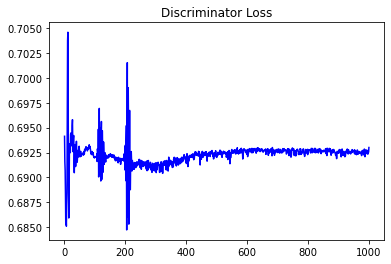

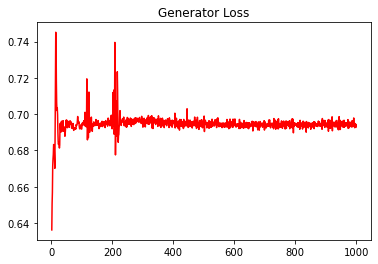

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.42387196020462037


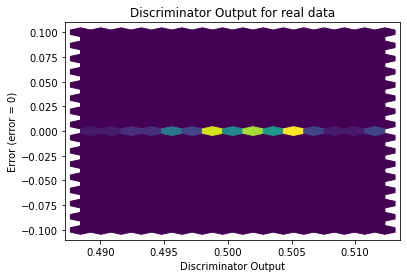

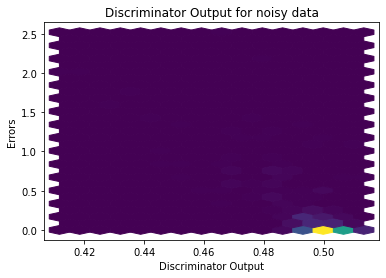

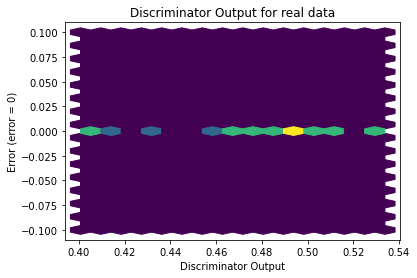

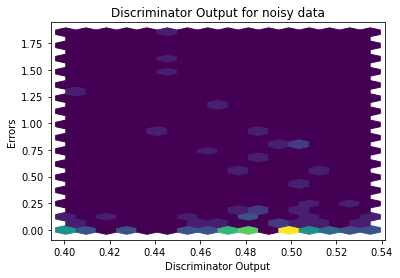

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


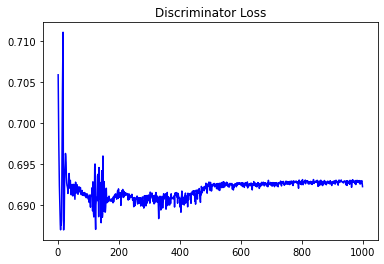

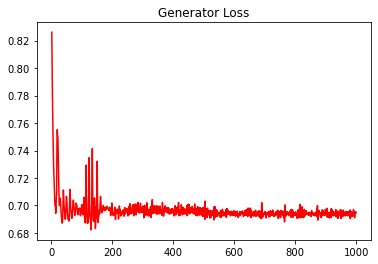

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.48960155253955273


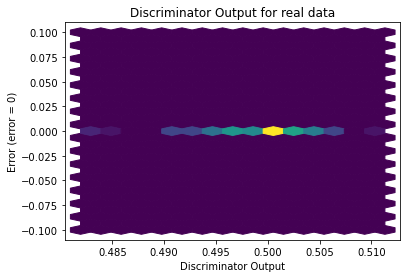

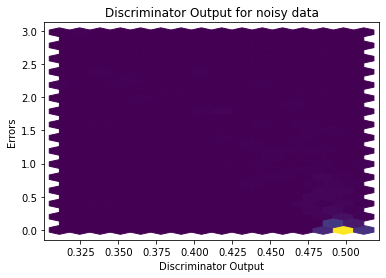

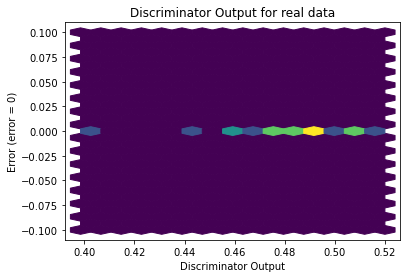

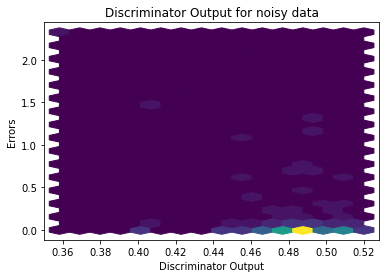

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6146]], requires_grad=True)
